# Chemco Manufacturing

Chemco produce tres productos: 1, 2 y 3. Cada libra de materia prima cuesta $\$25$. Se somete a procesamiento
y rinde 3 oz de producto 1 y 1 oz de producto 2. Cuesta
$\$1$ y requiere 2 horas de trabajo para procesar cada libra de crudo
material. Cada onza de producto 1 se puede utilizar en uno de
tres maneras.
Se puede vender a 10 dólares la onza.
Se puede procesar en 1 onza del producto 2. Esto requiere 2 horas de mano de obra y cuesta $\$1$.
Se puede procesar para obtener 1 onza del producto 3. Esto requiere 3 horas de mano de obra y cuesta $\$2$.
Cada onza del producto 2 se puede utilizar de dos maneras.
Se puede vender a 20 dólares la onza.
Se puede procesar para obtener 1 onza del producto 3. Esto requiere 1 hora de mano de obra y cuesta $\$6$.
El producto 3 se vende a $\$30/oz$. El número máximo de
Las onzas de cada producto que se pueden vender se dan en la Tabla 23.
Se dispone de un máximo de 25.000 horas de mano de obra.
Determine cómo Chemco puede maximizar las ganancias.

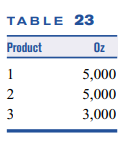

#Conjuntos

$ i = \text{Productos indexados por } i$

$ j = \text{Productos indexados por } j$

# Parámetros

$I_{i} = \textrm{Ingreso de vender el producto } i$

$IU_{j} = \textrm{Ingreso de vender el producto } j$

$ CP_{i} = \textrm{Costo de procesamiento de los productos } i $

$ CPU_{i} = \textrm{Costo de procesamiento de los productos } i $

$ CM_{i} = \textrm{Costo de la materia prima } i $

$ H1_{i} = \textrm{Número de horas de mano de obra } i $

$ H2_{i} = \textrm{Número de horas de mano de obra } i $

$ P_{i} = \textrm{Máxima cantidad de producto que se puede vender } i $

$ M_{ij} = \textrm{1 si se puede transformar, 0 si no} $

$ W_{ij} = \textrm{1 si se puede transformar, 0 si no} $


## Variables de decisión

$ x_{i} = \textrm{Cantidad de producto 1 producida o transformada para ser vendida } i$

$ y_{i} = \textrm{Cantidad de producto 2 producida o transformada para ser vendida } i$

$ z = \textrm{Cantidad de materia prima comprada }$

## Función Objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} I_{i}\: x_{i} + \sum_{i = 1}^{n} IU_{j}\: y_{j} - CM z - \sum_{i = 1}^{n} CP_{i}\: x_{i} - \sum_{i = 1}^{n} CPU_{j}\: y_{j}$$

# Restricciones

Los productos tienen un límite,

$$ M_{ij} x_{i} + W_{ij} y_{i} \leq P_{i}, \forall j $$

Se tiene como máximo 25000 horas de mano de obra,

$$ \sum_{i = 1}^{n} H1_{i}\: x_{i} + \sum_{j = 1}^{n} H2_{j}\: y_{j} \leq 25000$$

Hay una relación entre la materia prima,

$$ \sum_{i = 1}^{n} x_{i} = 3z $$

$$ \sum_{i = 1}^{n} y_{i}= z $$



In [ ]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 41.5 MB/s eta 0:00:00


In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
productos = range(3)
productos1 = range(2)

In [ ]:
# Parametros

M = [[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]

W = [[0, 0],
    [1, 0],
    [0, 1]]

I = [10, 20, 30]

IU = [20, 30]

CM = 25

CP = [1, 1, 2]

CPU = [1, 6]

H1 = [2, 4, 5]

H2 = [2, 3]

P = [5000, 5000, 3000]

In [ ]:
# Crear la instancia del modelo
model = LpProblem(name="Chemco_Manufacturing", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (productos), 0, None, LpContinuous)
Y = LpVariable.dicts("Y", (productos1), 0, None, LpContinuous)
Z = LpVariable("Z", 0, None, LpInteger)

# Restricciones

# Agregar la función objetivo
model += (lpSum([I[i] * X[i] for i in productos]) + lpSum(IU[j] * Y[j] for j in productos1)
          - CM * Z - lpSum([CP[i] * X[i] for i in productos]) - lpSum([CPU[j] * Y[j] for j in productos1]))

# Agregar las restricciones

for j in range(3):
  model += lpSum([M[i][j] * X[i] for i in productos]) + lpSum([W[j][h] * Y[h] for h in productos1]) <= P[j]

model += lpSum([H1[i] * X[i] for i in productos]) + lpSum([H2[j] * Y[j] for j in productos1]) <= 25000

model += lpSum([X[i] for i in productos]) == 3 * Z

model += lpSum([Y[j] for j in productos1]) == Z

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 4.0
X_1 = 1712.0
X_2 = 3000.0
Y_0 = 1572.0
Y_1 = 0.0
Z = 1572.0
Utilidades totales = $ 107132.0


In [ ]:
model

Chemco_Manufacturing:
MAXIMIZE
9*X_0 + 19*X_1 + 28*X_2 + 19*Y_0 + 24*Y_1 + -25*Z + 0
SUBJECT TO
_C1: X_0 <= 5000

_C2: X_1 + Y_0 <= 5000

_C3: X_2 + Y_1 <= 3000

_C4: 2 X_0 + 4 X_1 + 5 X_2 + 2 Y_0 + 3 Y_1 <= 25000

_C5: X_0 + X_1 + X_2 - 3 Z = 0

_C6: Y_0 + Y_1 - Z = 0

VARIABLES
X_0 Continuous
X_1 Continuous
X_2 Continuous
Y_0 Continuous
Y_1 Continuous
0 <= Z Integer